<a href="https://colab.research.google.com/github/41371112h/114-1/blob/main/HW1_%E6%97%A5%E5%B8%B8%E6%94%AF%E5%87%BA%E9%80%9F%E7%AE%97%E8%88%87%E5%88%86%E6%94%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
from google.auth import default
import pandas as pd
import re

# ====== 1. 授權 ======
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
print("已完成 Google 帳號授權")

# ====== 2. 開啟試算表 ======
sheet_url = "https://docs.google.com/spreadsheets/d/1HvCj-v296pFicLIjB5BbsX5U26Pd4d76QM5iuF1NeSo/edit?gid=0#gid=0"
sheet_id = re.search(r'/d/([a-zA-Z0-9-_]+)', sheet_url).group(1)

spreadsheet = gc.open_by_key(sheet_id)

# 主表：消費紀錄
try:
    worksheet = spreadsheet.worksheet("消費紀錄")
except gspread.exceptions.WorksheetNotFound:
    worksheet = spreadsheet.add_worksheet(title="消費紀錄", rows=1000, cols=5)
    worksheet.append_row(["日期", "時間", "品項", "分類", "金額"])

# Summary 表
try:
    summary_ws = spreadsheet.worksheet("Summary")
except gspread.exceptions.WorksheetNotFound:
    summary_ws = spreadsheet.add_worksheet(title="Summary", rows=1000, cols=5)

print("已打開工作表: 消費紀錄 + Summary")

# ====== 3. 讀取現有資料到 DataFrame ======
df = get_as_dataframe(worksheet, evaluate_formulas=True, dtype=str)
df = df.dropna(how="all")
if df.empty:
    df = pd.DataFrame(columns=["日期", "時間", "品項", "分類", "金額"])

# ====== 4. 文字輸入並即時寫入 ======
records = []
while True:
    date = input("請輸入日期 (YYYY-MM-DD): ")
    time = input("請輸入時間 (HH:MM): ")
    item = input("請輸入品項: ")
    category = input("請輸入分類 (例如: 餐飲/交通/娛樂): ")
    amount = input("請輸入金額: ")

    record = {"日期": date, "時間": time, "品項": item, "分類": category, "金額": float(amount)}
    records.append(record)
    df = pd.concat([df, pd.DataFrame([record])], ignore_index=True)

    worksheet.append_row([date, time, item, category, float(amount)])
    print("已新增一筆紀錄到 消費紀錄！")

# ====== 5. 更新 Summary ======
    summary = df.groupby("分類")["金額"].sum().reset_index()
    summary.loc[len(summary)] = ["總額", df["金額"].astype(float).sum()]  # 加總額

    summary_ws.clear()
    set_with_dataframe(summary_ws, summary)
    print("Summary 已更新！\n")

# ====== 6. 結束後顯示 ======
print("\n--- 所有紀錄 ---")
print(df)

print("\n--- 分類小計 + 總額 ---")
print(summary)

/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig1.tight_layout()
/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  fig1.tight_layout()
/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) DejaVu Sans.
  fig1.tight_layout()
/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 36027 (\N{CJK UNIFIED IDEOGRAPH-8CBB}) missing from font(s) DejaVu Sans.
  fig1.tight_layout()
/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig1.tight_layout()
/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig1.tight_layout()
/tmp/ipython-input-577171073.py:103: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5})

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76dfbf8404c2d2ff6c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36092 (\N{CJK UNIFIED IDEOGRAPH-8CFC}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

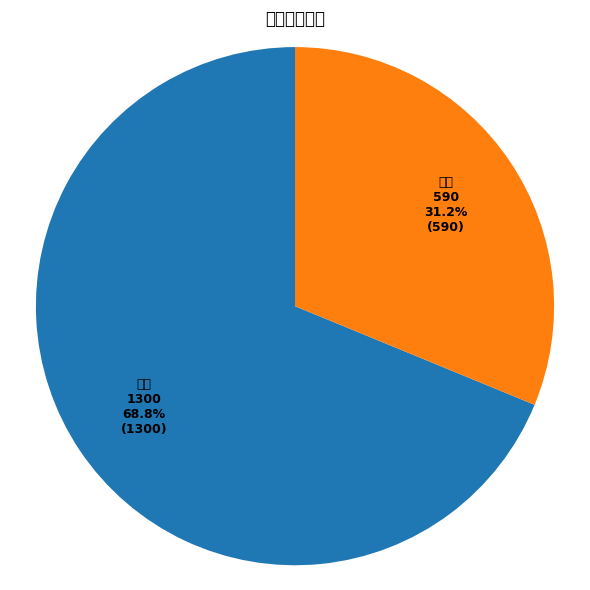

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


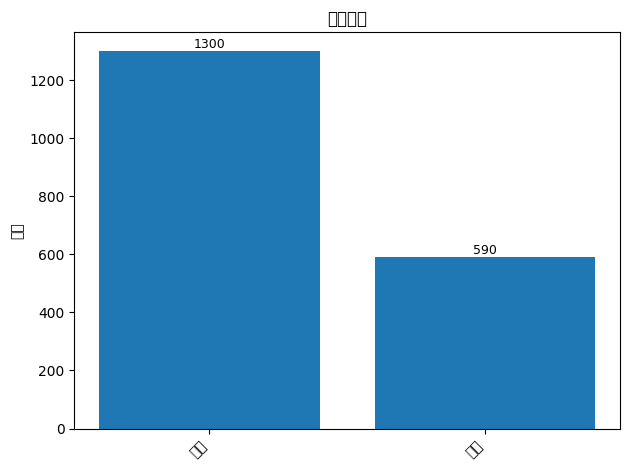

In [6]:
# Gradio + Google Sheets（含分類標籤圖表｜Textbox 日期版）
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
from google.auth import default
import pandas as pd
import re
import gradio as gr
import matplotlib.pyplot as plt
import traceback
from datetime import datetime, date

# ====== 設定：換成你的試算表網址 ======
SHEET_URL = "https://docs.google.com/spreadsheets/d/1HvCj-v296pFicLIjB5BbsX5U26Pd4d76QM5iuF1NeSo/edit?gid=0"

# ====== 1. 授權 ======
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# ====== 2. 開啟試算表 & 確保工作表存在 ======
sheet_id = re.search(r'/d/([a-zA-Z0-9-_]+)', SHEET_URL).group(1)
spreadsheet = gc.open_by_key(sheet_id)

# 主表
try:
    worksheet = spreadsheet.worksheet("消費紀錄")
except gspread.exceptions.WorksheetNotFound:
    worksheet = spreadsheet.add_worksheet(title="消費紀錄", rows=2000, cols=6)
    worksheet.append_row(["日期", "時間", "品項", "分類", "金額"])

# Summary 表
try:
    summary_ws = spreadsheet.worksheet("Summary")
except gspread.exceptions.WorksheetNotFound:
    summary_ws = spreadsheet.add_worksheet(title="Summary", rows=500, cols=4)

# ====== 小工具：統一把輸入的日期轉成 'YYYY-MM-DD' 或回傳 None ======
def _to_date_str(d):
    if d is None or d == "":
        return None
    try:
        return pd.to_datetime(d).strftime("%Y-%m-%d")
    except Exception:
        return None

# ====== 輔助函式：從 Sheet 重新讀取最新 df ======
def load_df_from_sheet():
    try:
        tmp = get_as_dataframe(worksheet, evaluate_formulas=True, dtype=str)
    except Exception as e:
        return pd.DataFrame(columns=["日期","時間","品項","分類","金額"]), str(e)
    tmp = tmp.dropna(how="all")
    if tmp.empty:
        tmp = pd.DataFrame(columns=["日期","時間","品項","分類","金額"])
    if "金額" not in tmp.columns:
        tmp["金額"] = 0
    cols = ["日期","時間","品項","分類","金額"]
    for c in cols:
        if c not in tmp.columns:
            tmp[c] = ""
    tmp = tmp[cols]
    return tmp, None

# ====== 更新 Summary 與製作圖表（分類標籤在圖表上） ======
def make_summary_and_plots(df_input):
    dfc = df_input.copy()
    dfc["金額"] = pd.to_numeric(dfc["金額"], errors="coerce").fillna(0)
    summary = dfc.groupby("分類", dropna=False)["金額"].sum().reset_index()
    summary["分類"] = summary["分類"].fillna("(未分類)")
    total = dfc["金額"].sum()
    summary2 = summary.copy()
    summary2.loc[len(summary2)] = ["總額", total]

    try:
        summary_ws.clear()
        set_with_dataframe(summary_ws, summary2)
    except Exception as e:
        print("寫回 Summary 失敗：", e)

    plot_df = summary[summary["分類"] != "總額"] if "總額" in summary["分類"].values else summary

    # 圓餅圖
    fig1, ax1 = plt.subplots(figsize=(6, 6))  # 放大避免擠壓
    if not plot_df.empty and plot_df["金額"].sum() > 0:
        total_sum = float(plot_df["金額"].sum())
        wedges, texts, autotexts = ax1.pie(
            plot_df["金額"],
            labels=None,                   # 不用外側標籤，避免被裁掉
            autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*total_sum))})",
            startangle=90,
            pctdistance=0.7               # 讓百分比/內文靠內一點
        )
        for i, t in enumerate(autotexts):
            t.set_text(
                f"{plot_df['分類'].iloc[i]}\n"
                f"{plot_df['金額'].iloc[i]:.0f}\n"
                f"{t.get_text()}"
            )
            t.set(size=9, weight="bold", ha="center", va="center")
    ax1.axis("equal")
    ax1.set_title("分類消費比例")
    fig1.tight_layout()



    # 長條圖
    fig2, ax2 = plt.subplots()
    if not plot_df.empty:
        bars = ax2.bar(plot_df["分類"], plot_df["金額"])
        ax2.set_xticks(range(len(plot_df)))
        ax2.set_xticklabels(plot_df["分類"], rotation=45, ha='right')
        ax2.set_ylabel("金額")
        for bar, val in zip(bars, plot_df["金額"]):
            ax2.text(bar.get_x() + bar.get_width()/2,
                     val,
                     f"{val:.0f}",
                     ha="center", va="bottom", fontsize=9, color="black")
    ax2.set_title("分類金額")
    fig2.tight_layout()

    return dfc, summary2, fig1, fig2

# ====== 新增紀錄 ======
def add_record(date_in, time, item, category, amount):
    try:
        date_str = _to_date_str(date_in)
        if not date_str or not time or not item or not category or amount is None:
            return pd.DataFrame(columns=["日期","時間","品項","分類","金額"]), pd.DataFrame(), None, None, "⚠️ 請完整填寫所有欄位"

        try:
            amount_val = float(amount)
        except:
            return pd.DataFrame(columns=["日期","時間","品項","分類","金額"]), pd.DataFrame(), None, None, "⚠️ 金額需為數字"

        worksheet.append_row([date_str, time, item, category, amount_val], value_input_option='USER_ENTERED')

        df_new, load_err = load_df_from_sheet()
        if load_err:
            return pd.DataFrame(columns=["日期","時間","品項","分類","金額"]), pd.DataFrame(), None, None, f"新增成功但讀取失敗：{load_err}"

        df_disp, summary_df, fig1, fig2 = make_summary_and_plots(df_new)
        return df_disp, summary_df, fig1, fig2, " 已新增紀錄並更新 Summary"

    except Exception as e:
        tb = traceback.format_exc()
        return pd.DataFrame(), pd.DataFrame(), None, None, f"發生錯誤：{e}\n{tb}"

# ====== 篩選區間 ======
def filter_by_date(start_date, end_date):
    try:
        df_new, load_err = load_df_from_sheet()
        if load_err:
            return pd.DataFrame(), pd.DataFrame(), None, None, f"讀取失敗：{load_err}"

        sd = _to_date_str(start_date)
        ed = _to_date_str(end_date)

        df_new["日期"] = pd.to_datetime(df_new["日期"], errors="coerce")
        if sd:
            df_new = df_new[df_new["日期"] >= pd.to_datetime(sd)]
        if ed:
            df_new = df_new[df_new["日期"] <= pd.to_datetime(ed)]

        if df_new.empty:
            return df_new, pd.DataFrame(), None, None, "⚠️ 此區間無紀錄"

        df_disp, summary_df, fig1, fig2 = make_summary_and_plots(df_new)
        nice_sd = sd if sd else "未指定"
        nice_ed = ed if ed else "未指定"
        return df_disp, summary_df, fig1, fig2, f" 已篩選 {nice_sd} ~ {nice_ed}"

    except Exception as e:
        tb = traceback.format_exc()
        return pd.DataFrame(), pd.DataFrame(), None, None, f"篩選發生錯誤：{e}\n{tb}"

# ====== 本月篩選 ======
def filter_this_month():
    today = datetime.today()
    start_date = today.replace(day=1).strftime("%Y-%m-%d")
    if today.month == 12:
        end_dt = today.replace(year=today.year+1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_dt = today.replace(month=today.month+1, day=1) - pd.Timedelta(days=1)
    end_date = end_dt.strftime("%Y-%m-%d")
    return filter_by_date(start_date, end_date)

# ====== Gradio 介面（用 Textbox 填日期） ======
df_init, _ = load_df_from_sheet()
df_init["金額"] = pd.to_numeric(df_init["金額"], errors="coerce").fillna(0)
df_show, summary_show, fig_init1, fig_init2 = make_summary_and_plots(df_init)

with gr.Blocks() as demo:
    gr.Markdown("##  記帳 (Gradio + Google Sheets) — 圖表分類標籤版｜Textbox 日期")

    with gr.Tab(" 新增紀錄"):
        with gr.Row():
            in_date = gr.Textbox(label="日期 (YYYY-MM-DD)", value=date.today().strftime("%Y-%m-%d"))
            in_time = gr.Textbox(label="時間 (HH:MM)", value=datetime.now().strftime("%H:%M"))
        with gr.Row():
            in_item = gr.Textbox(label="品項")
            in_cat = gr.Textbox(label="分類")
            in_amount = gr.Number(label="金額")
        btn_add = gr.Button("新增紀錄")

        status1 = gr.Markdown()
        table_records = gr.Dataframe(value=df_show, headers=["日期","時間","品項","分類","金額"], interactive=False)
        table_summary = gr.Dataframe(value=summary_show, headers=["分類","金額"], interactive=False)
        plot_pie = gr.Plot(value=fig_init1)
        plot_bar = gr.Plot(value=fig_init2)

        btn_add.click(fn=add_record,
                      inputs=[in_date, in_time, in_item, in_cat, in_amount],
                      outputs=[table_records, table_summary, plot_pie, plot_bar, status1])

    with gr.Tab(" 篩選 / 本月"):
        with gr.Row():
            start_box = gr.Textbox(label="起始日期 (YYYY-MM-DD)")
            end_box = gr.Textbox(label="結束日期 (YYYY-MM-DD)")
        with gr.Row():
            btn_filter = gr.Button("查詢區間")
            btn_this_month = gr.Button("本月紀錄")

        status2 = gr.Markdown()
        table_records2 = gr.Dataframe(headers=["日期","時間","品項","分類","金額"], interactive=False)
        table_summary2 = gr.Dataframe(headers=["分類","金額"], interactive=False)
        plot_pie2 = gr.Plot()
        plot_bar2 = gr.Plot()

        btn_filter.click(fn=filter_by_date,
                         inputs=[start_box, end_box],
                         outputs=[table_records2, table_summary2, plot_pie2, plot_bar2, status2])
        btn_this_month.click(fn=filter_this_month,
                             inputs=None,
                             outputs=[table_records2, table_summary2, plot_pie2, plot_bar2, status2])

demo.launch()
